# Kernel Ridge (Hyperparameter Tuning)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=4.52102e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.84358e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=5.43473e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual p

Best Hyperparameter (alpha): 100.0
Best Kernel: poly


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Test set scores with Hyperparameter Tuning:
MAPE on Test Set: 1.79%
MAE on Test Set: 14.80
MSE on Test Set: 435.14
RMSE on Test Set: 20.86
R2 on Test Set: 0.95


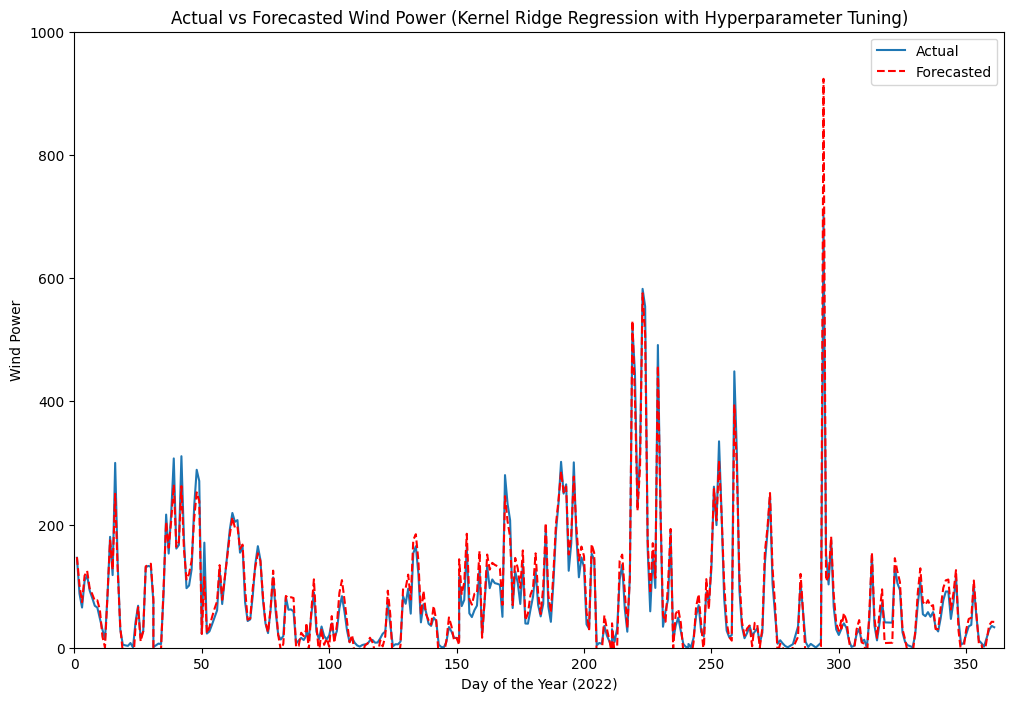

In [1]:
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Define the parameter grid for grid search
param_grid = {
    'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize Kernel Ridge model
kernel_ridge_model = KernelRidge()

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize GridSearchCV
grid_search = GridSearchCV(kernel_ridge_model, param_grid, cv=tscv, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_alpha = grid_search.best_params_['alpha']
best_kernel = grid_search.best_params_['kernel']

# Print the best hyperparameter values
print(f"Best Hyperparameter (alpha): {best_alpha}")
print(f"Best Kernel: {best_kernel}")

# Create and fit the Kernel Ridge model with the best hyperparameters
best_kernel_ridge_model = KernelRidge(alpha=best_alpha, kernel=best_kernel)
best_kernel_ridge_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_kernel_ridge_model.predict(X_test)

# Calculate evaluation metrics on the test set
mape = mean_absolute_percentage_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print('Test set scores with Hyperparameter Tuning:')
print(f"MAPE on Test Set: {mape:.2f}%")
print(f"MAE on Test Set: {mae:.2f}")
print(f"MSE on Test Set: {mse:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")
print(f"R2 on Test Set: {r2:.2f}")

# Plot the actual and forecast values
plt.figure(figsize=(12, 8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], predictions, label='Forecasted', color='red', linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (Kernel Ridge Regression with Hyperparameter Tuning)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)  # Set the y-axis limit to 1000

plt.show()


# Kernel Ridge using best hyperparameter

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Test set scores with Best Hyperparameters:
MAPE on Test Set: 0.59%
MAE on Test Set: 9.82
MSE on Test Set: 153.94
RMSE on Test Set: 12.41
R2 on Test Set: 0.97


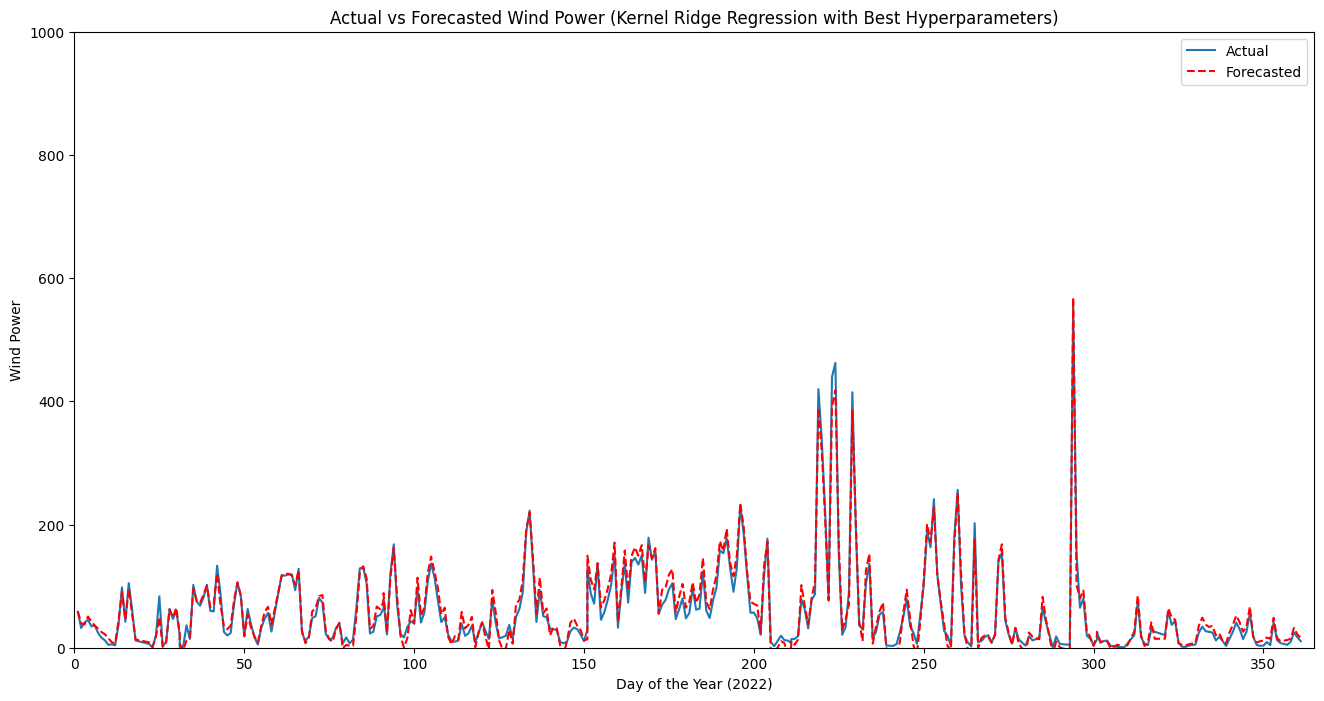

In [8]:
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Parkay_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Best Hyperparameters from the grid search
best_alpha = 100.0
best_kernel = 'poly'

# Initialize Kernel Ridge model with the best hyperparameters
kernel_ridge_model = KernelRidge(alpha=best_alpha, kernel=best_kernel)

# Fit the model to the training data
kernel_ridge_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = kernel_ridge_model.predict(X_test)

# Calculate evaluation metrics on the test set
mape = mean_absolute_percentage_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print('Test set scores with Best Hyperparameters:')
print(f"MAPE on Test Set: {mape:.2f}%")
print(f"MAE on Test Set: {mae:.2f}")
print(f"MSE on Test Set: {mse:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")
print(f"R2 on Test Set: {r2:.2f}")

# Plot the actual and forecast values
plt.figure(figsize=(16, 8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], predictions, label='Forecasted', color='red', linestyle='--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (Kernel Ridge Regression with Best Hyperparameters)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)  # Set the y-axis limit to 1000

plt.show()


Kernel ridge bagging

In [9]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Initialize Kernel Ridge model with the best hyperparameters
kernel_ridge_model = KernelRidge(alpha=100.0, kernel='poly', degree=3)  # Use the best hyperparameters

# Initialize Time Series Split Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Lists to store evaluation metrics for each fold
kernel_ridge_mape_scores = []
kernel_ridge_mae_scores = []
kernel_ridge_mse_scores = []
kernel_ridge_rmse_scores = []
kernel_ridge_r2_scores = []

bagging_mape_scores = []
bagging_mae_scores = []
bagging_mse_scores = []
bagging_rmse_scores = []
bagging_r2_scores = []

# Perform Time Series Cross-Validation
for train_index, test_index in tscv.split(X_train):
    X_train_split, X_test_split = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the Kernel Ridge model
    kernel_ridge_model.fit(X_train_split, y_train_split)

    # Train the Bagging Regressor with the Kernel Ridge model
    bagging_model = BaggingRegressor(base_estimator=kernel_ridge_model, random_state=42)
    bagging_model.fit(X_train_split, y_train_split)

    # Make predictions on the test set using Kernel Ridge
    kernel_ridge_predictions = kernel_ridge_model.predict(X_test_split)

    # Make predictions on the test set using Bagging
    bagging_predictions = bagging_model.predict(X_test_split)

    # Calculate evaluation metrics for Kernel Ridge
    kernel_ridge_mape = mean_absolute_percentage_error(y_test_split, kernel_ridge_predictions)
    kernel_ridge_mae = mean_absolute_error(y_test_split, kernel_ridge_predictions)
    kernel_ridge_mse = mean_squared_error(y_test_split, kernel_ridge_predictions)
    kernel_ridge_rmse = np.sqrt(kernel_ridge_mse)
    kernel_ridge_r2 = r2_score(y_test_split, kernel_ridge_predictions)

    # Calculate evaluation metrics for Bagging
    bagging_mape = mean_absolute_percentage_error(y_test_split, bagging_predictions)
    bagging_mae = mean_absolute_error(y_test_split, bagging_predictions)
    bagging_mse = mean_squared_error(y_test_split, bagging_predictions)
    bagging_rmse = np.sqrt(bagging_mse)
    bagging_r2 = r2_score(y_test_split, bagging_predictions)

    # Append the scores to the respective lists
    kernel_ridge_mape_scores.append(kernel_ridge_mape)
    kernel_ridge_mae_scores.append(kernel_ridge_mae)
    kernel_ridge_mse_scores.append(kernel_ridge_mse)
    kernel_ridge_rmse_scores.append(kernel_ridge_rmse)
    kernel_ridge_r2_scores.append(kernel_ridge_r2)

    bagging_mape_scores.append(bagging_mape)
    bagging_mae_scores.append(bagging_mae)
    bagging_mse_scores.append(bagging_mse)
    bagging_rmse_scores.append(bagging_rmse)
    bagging_r2_scores.append(bagging_r2)

# Calculate the mean scores across all folds for Kernel Ridge
kernel_ridge_mean_mape = np.mean(kernel_ridge_mape_scores)
kernel_ridge_mean_mae = np.mean(kernel_ridge_mae_scores)
kernel_ridge_mean_mse = np.mean(kernel_ridge_mse_scores)
kernel_ridge_mean_rmse = np.mean(kernel_ridge_rmse_scores)
kernel_ridge_mean_r2 = np.mean(kernel_ridge_r2_scores)

# Initialize variables for Bagging mean scores
bagging_mean_mape = 0
bagging_mean_mae = 0
bagging_mean_mse = 0
bagging_mean_rmse = 0
bagging_mean_r2 = 0

# Calculate the mean scores across all folds for Bagging
if bagging_mape_scores:
    bagging_mean_mape = np.mean(bagging_mape_scores)
    bagging_mean_mae = np.mean(bagging_mae_scores)
    bagging_mean_mse = np.mean(bagging_mse_scores)
    bagging_mean_rmse = np.mean(bagging_rmse_scores)
    bagging_mean_r2 = np.mean(bagging_r2_scores)

# Print the mean evaluation metrics for Kernel Ridge
print("Kernel Ridge Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {kernel_ridge_mean_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {kernel_ridge_mean_mae:.2f}")
print(f"Mean Squared Error (MSE): {kernel_ridge_mean_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {kernel_ridge_mean_rmse:.2f}")
print(f"Mean R-squared (R2): {kernel_ridge_mean_r2:.2f}")

# Train the Kernel Ridge model on the full training set
kernel_ridge_model.fit(X_train, y_train)

# Make predictions on the test set using Kernel Ridge
kernel_ridge_predictions_test = kernel_ridge_model.predict(X_test)

# Calculate evaluation metrics for Kernel Ridge on the test set
kernel_ridge_mape_test = mean_absolute_percentage_error(y_test, kernel_ridge_predictions_test)
kernel_ridge_mae_test = mean_absolute_error(y_test, kernel_ridge_predictions_test)
kernel_ridge_mse_test = mean_squared_error(y_test, kernel_ridge_predictions_test)
kernel_ridge_rmse_test = np.sqrt(kernel_ridge_mse_test)
kernel_ridge_r2_test = r2_score(y_test, kernel_ridge_predictions_test)

print("\nKernel Ridge Test Set Metrics:")
print(f"MAPE on Test Set: {kernel_ridge_mape_test:.2f}%")
print(f"MAE on Test Set: {kernel_ridge_mae_test:.2f}")
print(f"MSE on Test Set: {kernel_ridge_mse_test:.2f}")
print(f"RMSE on Test Set: {kernel_ridge_rmse_test:.2f}")
print(f"R2 on Test Set: {kernel_ridge_r2_test:.2f}")

# Print the mean evaluation metrics for Bagging
print("\nBagging Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {bagging_mean_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {bagging_mean_mae:.2f}")
print(f"Mean Squared Error (MSE): {bagging_mean_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {bagging_mean_rmse:.2f}")
print(f"Mean R-squared (R2): {bagging_mean_r2:.2f}")

# Train the Bagging model on the full training set
bagging_model.fit(X_train, y_train)

# Make predictions on the test set using Bagging
bagging_predictions_test = bagging_model.predict(X_test)

# Calculate evaluation metrics for Bagging on the test set
bagging_mape_test = mean_absolute_percentage_error(y_test, bagging_predictions_test)
bagging_mae_test = mean_absolute_error(y_test, bagging_predictions_test)
bagging_mse_test = mean_squared_error(y_test, bagging_predictions_test)
bagging_rmse_test = np.sqrt(bagging_mse_test)
bagging_r2_test = r2_score(y_test, bagging_predictions_test)

print("\nBagging Test Set Metrics:")
print(f"MAPE on Test Set: {bagging_mape_test:.2f}%")
print(f"MAE on Test Set: {bagging_mae_test:.2f}")
print(f"MSE on Test Set: {bagging_mse_test:.2f}")
print(f"RMSE on Test Set: {bagging_rmse_test:.2f}")
print(f"R2 on Test Set: {bagging_r2_test:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py

Kernel Ridge Metrics:
Mean Absolute Percentage Error (MAPE): 1.08%
Mean Absolute Error (MAE): 17.00
Mean Squared Error (MSE): 1350.33
Root Mean Squared Error (RMSE): 33.20
Mean R-squared (R2): 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(



Kernel Ridge Test Set Metrics:
MAPE on Test Set: 1.79%
MAE on Test Set: 14.80
MSE on Test Set: 435.14
RMSE on Test Set: 20.86
R2 on Test Set: 0.95

Bagging Metrics:
Mean Absolute Percentage Error (MAPE): 1.17%
Mean Absolute Error (MAE): 16.09
Mean Squared Error (MSE): 1339.61
Root Mean Squared Error (RMSE): 32.62
Mean R-squared (R2): 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py


Bagging Test Set Metrics:
MAPE on Test Set: 1.74%
MAE on Test Set: 14.89
MSE on Test Set: 477.43
RMSE on Test Set: 21.85
R2 on Test Set: 0.95


kernel ridge boosting

In [10]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']

# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Initialize Kernel Ridge model with the best hyperparameters
kernel_ridge_model = KernelRidge(alpha=100.0, kernel='poly', degree=3)  # Use the best hyperparameters

# Initialize Time Series Split Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Lists to store evaluation metrics for each fold
kernel_ridge_mape_scores = []
kernel_ridge_mae_scores = []
kernel_ridge_mse_scores = []
kernel_ridge_rmse_scores = []
kernel_ridge_r2_scores = []

boosting_mape_scores = []
boosting_mae_scores = []
boosting_mse_scores = []
boosting_rmse_scores = []
boosting_r2_scores = []

# Perform Time Series Cross-Validation
for train_index, test_index in tscv.split(X_train):
    X_train_split, X_test_split = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the Kernel Ridge model
    kernel_ridge_model.fit(X_train_split, y_train_split)

    # Train the AdaBoost Regressor with the Kernel Ridge model
    boosting_model = AdaBoostRegressor(base_estimator=kernel_ridge_model, random_state=42)
    boosting_model.fit(X_train_split, y_train_split)

    # Make predictions on the test set using Kernel Ridge
    kernel_ridge_predictions = kernel_ridge_model.predict(X_test_split)

    # Make predictions on the test set using AdaBoost
    boosting_predictions = boosting_model.predict(X_test_split)

    # Calculate evaluation metrics for Kernel Ridge
    kernel_ridge_mape = mean_absolute_percentage_error(y_test_split, kernel_ridge_predictions)
    kernel_ridge_mae = mean_absolute_error(y_test_split, kernel_ridge_predictions)
    kernel_ridge_mse = mean_squared_error(y_test_split, kernel_ridge_predictions)
    kernel_ridge_rmse = np.sqrt(kernel_ridge_mse)
    kernel_ridge_r2 = r2_score(y_test_split, kernel_ridge_predictions)

    # Calculate evaluation metrics for AdaBoost
    boosting_mape = mean_absolute_percentage_error(y_test_split, boosting_predictions)
    boosting_mae = mean_absolute_error(y_test_split, boosting_predictions)
    boosting_mse = mean_squared_error(y_test_split, boosting_predictions)
    boosting_rmse = np.sqrt(boosting_mse)
    boosting_r2 = r2_score(y_test_split, boosting_predictions)

    # Append the scores to the respective lists
    kernel_ridge_mape_scores.append(kernel_ridge_mape)
    kernel_ridge_mae_scores.append(kernel_ridge_mae)
    kernel_ridge_mse_scores.append(kernel_ridge_mse)
    kernel_ridge_rmse_scores.append(kernel_ridge_rmse)
    kernel_ridge_r2_scores.append(kernel_ridge_r2)

    boosting_mape_scores.append(boosting_mape)
    boosting_mae_scores.append(boosting_mae)
    boosting_mse_scores.append(boosting_mse)
    boosting_rmse_scores.append(boosting_rmse)
    boosting_r2_scores.append(boosting_r2)

# Calculate the mean scores across all folds for Kernel Ridge
kernel_ridge_mean_mape = np.mean(kernel_ridge_mape_scores)
kernel_ridge_mean_mae = np.mean(kernel_ridge_mae_scores)
kernel_ridge_mean_mse = np.mean(kernel_ridge_mse_scores)
kernel_ridge_mean_rmse = np.mean(kernel_ridge_rmse_scores)
kernel_ridge_mean_r2 = np.mean(kernel_ridge_r2_scores)

# Initialize variables for AdaBoost mean scores
boosting_mean_mape = 0
boosting_mean_mae = 0
boosting_mean_mse = 0
boosting_mean_rmse = 0
boosting_mean_r2 = 0

# Calculate the mean scores across all folds for AdaBoost
if boosting_mape_scores:
    boosting_mean_mape = np.mean(boosting_mape_scores)
    boosting_mean_mae = np.mean(boosting_mae_scores)
    boosting_mean_mse = np.mean(boosting_mse_scores)
    boosting_mean_rmse = np.mean(boosting_rmse_scores)
    boosting_mean_r2 = np.mean(boosting_r2_scores)

# Print the mean evaluation metrics for Kernel Ridge
print("Kernel Ridge Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {kernel_ridge_mean_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {kernel_ridge_mean_mae:.2f}")
print(f"Mean Squared Error (MSE): {kernel_ridge_mean_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {kernel_ridge_mean_rmse:.2f}")
print(f"Mean R-squared (R2): {kernel_ridge_mean_r2:.2f}")

# Print the mean evaluation metrics for AdaBoost
print("\nAdaBoost Metrics:")
print(f"Mean Absolute Percentage Error (MAPE): {boosting_mean_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {boosting_mean_mae:.2f}")
print(f"Mean Squared Error (MSE): {boosting_mean_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {boosting_mean_rmse:.2f}")
print(f"Mean R-squared (R2): {boosting_mean_r2:.2f}")

# Train the Kernel Ridge model on the full training set
kernel_ridge_model.fit(X_train, y_train)

# Train the AdaBoost model on the full training set
boosting_model.fit(X_train, y_train)

# Make predictions on the test set using Kernel Ridge
kernel_ridge_predictions_test = kernel_ridge_model.predict(X_test)

# Make predictions on the test set using AdaBoost
boosting_predictions_test = boosting_model.predict(X_test)

# Calculate evaluation metrics for Kernel Ridge on the test set
kernel_ridge_mape_test = mean_absolute_percentage_error(y_test, kernel_ridge_predictions_test)
kernel_ridge_mae_test = mean_absolute_error(y_test, kernel_ridge_predictions_test)
kernel_ridge_mse_test = mean_squared_error(y_test, kernel_ridge_predictions_test)
kernel_ridge_rmse_test = np.sqrt(kernel_ridge_mse_test)
kernel_ridge_r2_test = r2_score(y_test, kernel_ridge_predictions_test)

# Calculate evaluation metrics for AdaBoost on the test set
boosting_mape_test = mean_absolute_percentage_error(y_test, boosting_predictions_test)
boosting_mae_test = mean_absolute_error(y_test, boosting_predictions_test)
boosting_mse_test = mean_squared_error(y_test, boosting_predictions_test)
boosting_rmse_test = np.sqrt(boosting_mse_test)
boosting_r2_test = r2_score(y_test, boosting_predictions_test)

# Print the test set evaluation metrics for Kernel Ridge
print("\nKernel Ridge Test Set Metrics:")
print(f"MAPE on Test Set: {kernel_ridge_mape_test:.2f}%")
print(f"MAE on Test Set: {kernel_ridge_mae_test:.2f}")
print(f"MSE on Test Set: {kernel_ridge_mse_test:.2f}")
print(f"RMSE on Test Set: {kernel_ridge_rmse_test:.2f}")
print(f"R2 on Test Set: {kernel_ridge_r2_test:.2f}")

# Print the test set evaluation metrics for AdaBoost
print("\nAdaBoost Test Set Metrics:")
print(f"MAPE on Test Set: {boosting_mape_test:.2f}%")
print(f"MAE on Test Set: {boosting_mae_test:.2f}")
print(f"MSE on Test Set: {boosting_mse_test:.2f}")
print(f"RMSE on Test Set: {boosting_rmse_test:.2f}")
print(f"R2 on Test Set: {boosting_r2_test:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py

Kernel Ridge Metrics:
Mean Absolute Percentage Error (MAPE): 1.08%
Mean Absolute Error (MAE): 17.00
Mean Squared Error (MSE): 1350.33
Root Mean Squared Error (RMSE): 33.20
Mean R-squared (R2): 0.91

AdaBoost Metrics:
Mean Absolute Percentage Error (MAPE): 1.82%
Mean Absolute Error (MAE): 20.57
Mean Squared Error (MSE): 1394.40
Root Mean Squared Error (RMSE): 34.95
Mean R-squared (R2): 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py


Kernel Ridge Test Set Metrics:
MAPE on Test Set: 1.79%
MAE on Test Set: 14.80
MSE on Test Set: 435.14
RMSE on Test Set: 20.86
R2 on Test Set: 0.95

AdaBoost Test Set Metrics:
MAPE on Test Set: 2.64%
MAE on Test Set: 18.68
MSE on Test Set: 539.43
RMSE on Test Set: 23.23
R2 on Test Set: 0.94


# Kernel Ridge Regression Trained on Inani and Tested on Mongla

In [11]:
import pandas as pd
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

# Load your Inani dataset
inani_df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Load your Mongla dataset
mongla_df = pd.read_csv('/content/Mongla_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
inani_df = inani_df[inani_df['Avg_Power'] != 0]
mongla_df = mongla_df[mongla_df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
inani_df['DY'] = (inani_df['MO'] - 1) * 30 + inani_df['DY']
mongla_df['DY'] = (mongla_df['MO'] - 1) * 30 + mongla_df['DY']

# Split the Inani data into training and test sets
inani_train_df = inani_df[inani_df['YEAR'] <= 2021]  # Training data: 2013-2021
inani_test_df = inani_df[inani_df['YEAR'] == 2022]  # Test data: 2022

# Split the Mongla data into training and test sets
mongla_train_df = mongla_df[mongla_df['YEAR'] <= 2021]  # Training data: 2013-2021
mongla_test_df = mongla_df[mongla_df['YEAR'] == 2022]  # Test data: 2022

# Define X and y for training and testing
X_inani_train = inani_train_df[features]
y_inani_train = inani_train_df[target]
X_inani_test = inani_test_df[features]
y_inani_test = inani_test_df[target]

X_mongla_train = mongla_train_df[features]
y_mongla_train = mongla_train_df[target]
X_mongla_test = mongla_test_df[features]
y_mongla_test = mongla_test_df[target]

# Initialize Kernel Ridge model with the best hyperparameters
kernel_ridge_model = KernelRidge(alpha=100.0, kernel='poly', degree=3, coef0=1)

# Initialize Time Series Cross-Validation for Inani dataset
tscv_inani = TimeSeriesSplit(n_splits=5)

# Lists to store evaluation metrics
inani_mape_list = []
inani_mae_list = []
inani_mse_list = []
inani_rmse_list = []
inani_r2_list = []

# Perform Time Series Cross-Validation on the Inani dataset
for train_index, test_index in tscv_inani.split(X_inani_train):
    X_train_cv, X_test_cv = X_inani_train.iloc[train_index], X_inani_train.iloc[test_index]
    y_train_cv, y_test_cv = y_inani_train.iloc[train_index], y_inani_train.iloc[test_index]

    # Train the model
    kernel_ridge_model.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    predictions = kernel_ridge_model.predict(X_test_cv)

    # Calculate evaluation metrics
    mape = mean_absolute_percentage_error(y_test_cv, predictions)
    mae = mean_absolute_error(y_test_cv, predictions)
    mse = mean_squared_error(y_test_cv, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_cv, predictions)

    # Append metrics to lists
    inani_mape_list.append(mape)
    inani_mae_list.append(mae)
    inani_mse_list.append(mse)
    inani_rmse_list.append(rmse)
    inani_r2_list.append(r2)

# Calculate the average of evaluation metrics over all folds for the Inani dataset
average_inani_mape = np.mean(inani_mape_list)
average_inani_mae = np.mean(inani_mae_list)
average_inani_mse = np.mean(inani_mse_list)
average_inani_rmse = np.mean(inani_rmse_list)
average_inani_r2 = np.mean(inani_r2_list)

print('Inani dataset validation scores:')
print(f"Mean Average Percentage Error (MAPE): {average_inani_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {average_inani_mae:.2f}")
print(f"Mean Squared Error (MSE): {average_inani_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {average_inani_rmse:.2f}")
print(f"Mean R-squared (R2): {average_inani_r2:.2f}")

# Train the model on the full Inani training set
kernel_ridge_model.fit(X_inani_train, y_inani_train)

# Make predictions on the Inani test set
inani_predictions = kernel_ridge_model.predict(X_inani_test)

# Calculate evaluation metrics on the Inani test set
inani_mape = mean_absolute_percentage_error(y_inani_test, inani_predictions)
inani_mae = mean_absolute_error(y_inani_test, inani_predictions)
inani_mse = mean_squared_error(y_inani_test, inani_predictions)
inani_rmse = np.sqrt(inani_mse)
inani_r2 = r2_score(y_inani_test, inani_predictions)

print('\nInani dataset test scores:')
print(f"Mean Average Percentage Error (MAPE): {inani_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {inani_mae:.2f}")
print(f"Mean Squared Error (MSE): {inani_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {inani_rmse:.2f}")
print(f"Mean R-squared (R2): {inani_r2:.2f}")

# Now, apply the trained Kernel Ridge model to the Mongla dataset

# Make predictions on the Mongla test set
mongla_predictions = kernel_ridge_model.predict(X_mongla_test)

# Calculate evaluation metrics on the Mongla test set
mongla_mape = mean_absolute_percentage_error(y_mongla_test, mongla_predictions)
mongla_mae = mean_absolute_error(y_mongla_test, mongla_predictions)
mongla_mse = mean_squared_error(y_mongla_test, mongla_predictions)
mongla_rmse = np.sqrt(mongla_mse)
mongla_r2 = r2_score(y_mongla_test, mongla_predictions)

print('\nMongla dataset test scores using the Kernel Ridge model trained on Inani:')
print(f"Mean Average Percentage Error (MAPE): {mongla_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mongla_mae:.2f}")
print(f"Mean Squared Error (MSE): {mongla_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {mongla_rmse:.2f}")
print(f"Mean R-squared (R2): {mongla_r2:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Inani dataset validation scores:
Mean Average Percentage Error (MAPE): 1.08%
Mean Absolute Error (MAE): 17.00
Mean Squared Error (MSE): 1350.33
Root Mean Squared Error (RMSE): 33.20
Mean R-squared (R2): 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(



Inani dataset test scores:
Mean Average Percentage Error (MAPE): 1.79%
Mean Absolute Error (MAE): 14.80
Mean Squared Error (MSE): 435.14
Root Mean Squared Error (RMSE): 20.86
Mean R-squared (R2): 0.95

Mongla dataset test scores using the Kernel Ridge model trained on Inani:
Mean Average Percentage Error (MAPE): 0.89%
Mean Absolute Error (MAE): 12.45
Mean Squared Error (MSE): 244.54
Root Mean Squared Error (RMSE): 15.64
Mean R-squared (R2): 0.94


# Kernel Ridge Regression Trained on Inani and Tested on Parkay

In [ ]:
import pandas as pd
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

# Load your Inani dataset
inani_df = pd.read_csv('/content/Inani_daily_avg_power.csv')

# Load your Parkay dataset
parkay_df = pd.read_csv('/content/Parkay_daily_avg_power.csv')

# Preprocessing: Removing zero values from Avg_Power
inani_df = inani_df[inani_df['Avg_Power'] != 0]
parkay_df = parkay_df[parkay_df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
inani_df['DY'] = (inani_df['MO'] - 1) * 30 + inani_df['DY']
parkay_df['DY'] = (parkay_df['MO'] - 1) * 30 + parkay_df['DY']

# Split the Inani data into training and test sets
inani_train_df = inani_df[inani_df['YEAR'] <= 2021]  # Training data: 2013-2021
inani_test_df = inani_df[inani_df['YEAR'] == 2022]  # Test data: 2022

# Split the Parkay data into training and test sets
parkay_train_df = parkay_df[parkay_df['YEAR'] <= 2021]  # Training data: 2013-2021
parkay_test_df = parkay_df[parkay_df['YEAR'] == 2022]  # Test data: 2022

# Define X and y for training and testing
X_inani_train = inani_train_df[features]
y_inani_train = inani_train_df[target]
X_inani_test = inani_test_df[features]
y_inani_test = inani_test_df[target]

X_parkay_train = parkay_train_df[features]
y_parkay_train = parkay_train_df[target]
X_parkay_test = parkay_test_df[features]
y_parkay_test = parkay_test_df[target]

# Initialize Kernel Ridge model with the best hyperparameters
kernel_ridge_model = KernelRidge(alpha=100.0, kernel='poly')

# Initialize Time Series Cross-Validation for Inani dataset
tscv_inani = TimeSeriesSplit(n_splits=5)

# Lists to store evaluation metrics
inani_mape_list = []
inani_mae_list = []
inani_mse_list = []
inani_rmse_list = []
inani_r2_list = []

# Perform Time Series Cross-Validation on the Inani dataset
for train_index, test_index in tscv_inani.split(X_inani_train):
    X_train_cv, X_test_cv = X_inani_train.iloc[train_index], X_inani_train.iloc[test_index]
    y_train_cv, y_test_cv = y_inani_train.iloc[train_index], y_inani_train.iloc[test_index]

    # Train the model
    kernel_ridge_model.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    predictions = kernel_ridge_model.predict(X_test_cv)

    # Calculate evaluation metrics
    mape = mean_absolute_percentage_error(y_test_cv, predictions)
    mae = mean_absolute_error(y_test_cv, predictions)
    mse = mean_squared_error(y_test_cv, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_cv, predictions)

    # Append metrics to lists
    inani_mape_list.append(mape)
    inani_mae_list.append(mae)
    inani_mse_list.append(mse)
    inani_rmse_list.append(rmse)
    inani_r2_list.append(r2)

# Calculate the average of evaluation metrics over all folds for the Inani dataset
average_inani_mape = np.mean(inani_mape_list)
average_inani_mae = np.mean(inani_mae_list)
average_inani_mse = np.mean(inani_mse_list)
average_inani_rmse = np.mean(inani_rmse_list)
average_inani_r2 = np.mean(inani_r2_list)

print('Inani dataset validation scores:')
print(f"Mean Average Percentage Error (MAPE): {average_inani_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {average_inani_mae:.2f}")
print(f"Mean Squared Error (MSE): {average_inani_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {average_inani_rmse:.2f}")
print(f"Mean R-squared (R2): {average_inani_r2:.2f}")

# Train the model on the full Inani training set
kernel_ridge_model.fit(X_inani_train, y_inani_train)

# Make predictions on the Inani test set
inani_predictions = kernel_ridge_model.predict(X_inani_test)

# Calculate evaluation metrics on the Inani test set
inani_mape = mean_absolute_percentage_error(y_inani_test, inani_predictions)
inani_mae = mean_absolute_error(y_inani_test, inani_predictions)
inani_mse = mean_squared_error(y_inani_test, inani_predictions)
inani_rmse = np.sqrt(inani_mse)
inani_r2 = r2_score(y_inani_test, inani_predictions)

print('\nInani dataset test scores:')
print(f"Mean Average Percentage Error (MAPE): {inani_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {inani_mae:.2f}")
print(f"Mean Squared Error (MSE): {inani_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {inani_rmse:.2f}")
print(f"Mean R-squared (R2): {inani_r2:.2f}")

# Now, apply the trained Kernel Ridge model to the Parkay dataset

# Make predictions on the Parkay test set
parkay_predictions = kernel_ridge_model.predict(X_parkay_test)

# Calculate evaluation metrics on the Parkay test set
parkay_mape = mean_absolute_percentage_error(y_parkay_test, parkay_predictions)
parkay_mae = mean_absolute_error(y_parkay_test, parkay_predictions)
parkay_mse = mean_squared_error(y_parkay_test, parkay_predictions)
parkay_rmse = np.sqrt(parkay_mse)
parkay_r2 = r2_score(y_parkay_test, parkay_predictions)

print('\nParkay dataset test scores using the Kernel Ridge model trained on Inani:')
print(f"Mean Average Percentage Error (MAPE): {parkay_mape:.2f}%")
print(f"Mean Absolute Error (MAE): {parkay_mae:.2f}")
print(f"Mean Squared Error (MSE): {parkay_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {parkay_rmse:.2f}")
print(f"Mean R-squared (R2): {parkay_r2:.2f}")
